In [1]:
import pandas as pd

df = pd.read_csv('../glass.csv')

In [4]:
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218 entries, 0 to 217
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      218 non-null    float64
 1   Na      218 non-null    float64
 2   Mg      218 non-null    float64
 3   Al      218 non-null    float64
 4   Si      218 non-null    float64
 5   K       218 non-null    float64
 6   Ca      218 non-null    float64
 7   Ba      218 non-null    float64
 8   Fe      218 non-null    float64
dtypes: float64(9)
memory usage: 15.5 KB
None


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0


In [5]:
from sklearn.utils import shuffle

df_shuffled = shuffle(df, random_state=42)

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_shuffled)

In [9]:
from scipy.cluster.hierarchy import linkage
model = linkage(scaled_features, method='complete')

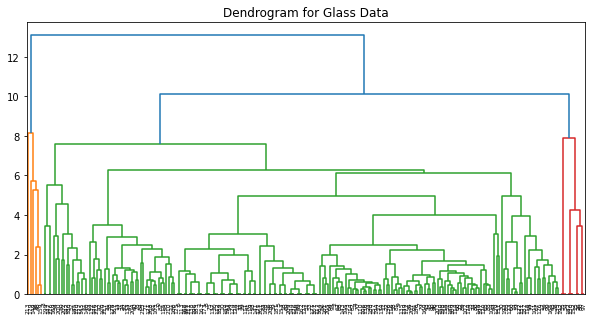

In [10]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram

plt.figure(figsize=(10,5))
plt.title('Dendrogram for Glass Data')
dendrogram(model, leaf_rotation=90, leaf_font_size=6)
plt.show()

In [11]:
from scipy.cluster.hierarchy import fcluster

labels = fcluster(model, t=9,criterion='distance')

In [14]:
df_shuffled['Predicted_Cluster'] = labels
df_shuffled.head()

<ipython-input-14-d91967e2d612>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_shuffled['Predicted_Cluster'] = labels


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Predicted_Cluster
100,1.51655,12.75,2.85,1.44,73.27,0.57,8.79,0.11,0.22,2
215,1.51640,14.37,0.00,2.74,72.85,0.00,9.45,0.54,0.00,2
139,1.51674,12.87,3.56,1.64,73.14,0.65,7.99,0.00,0.00,2
178,1.52247,14.86,2.20,2.06,70.26,0.76,9.76,0.00,0.00,2
15,1.51761,12.81,3.54,1.23,73.24,0.58,8.39,0.00,0.00,2
